### 1. Feature Exploration and Visualization

#### Exercise 1.1: Plot Feature Histograms and Distributions

- Objective: Understand the range, spread, and shape of individual feature distributions.
- Instructions: Choose two or three features from the dataset and plot their histograms. Describe any observations regarding the shape of these distributions (e.g., normal, skewed) and their implications for model training.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\CodeProjects\VsCodePythonPro\MachinelearningClass\EX6\Features.csv")
df

,10Percentile,90Percentile,Energy,Entropy,InterquartileRange,Kurtosis,Maximum,MeanAbsoluteDeviation,Mean,Median,...,DependenceVariance,HighGrayLevelEmphasis,LargeDependenceEmphasis,LargeDependenceHighGrayLevelEmphasis,LargeDependenceLowGrayLevelEmphasis,LowGrayLevelEmphasis,SmallDependenceEmphasis,SmallDependenceHighGrayLevelEmphasis,SmallDependenceLowGrayLevelEmphasis,Label
0,26,114,9920149104,2.215993,50,2.228714,182,26.609751,77.034447,83,...,42.099502,14.637696,333.991499,5838.802303,51.755990,0.173777,0.007553,0.093700,0.001791,1
1,29,135,15531884202,2.539379,65,1.872847,255,32.974426,86.993419,92,...,35.940302,18.459610,272.268794,5961.573109,34.854705,0.144798,0.008927,0.141192,0.001837,1
2,28,91,7967085514,1.826884,38,2.155482,119,19.947552,64.633566,70,...,35.607569,10.440268,422.176291,4974.195585,70.421721,0.187845,0.004684,0.040950,0.001370,1
3,31,110,11664586924,2.164309,44,2.278036,139,24.098128,77.119813,83,...,37.507100,14.492262,335.070908,5624.700198,45.343052,0.154104,0.006782,0.079815,0.001611,1
4,32,121,11956101422,2.309240,55,1.959340,148,27.784745,82.552554,89,...,37.170237,16.163342,316.292962,5811.911319,37.220679,0.135443,0.007262,0.100280,0.001568,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,41,137,19615084048,2.385230,52,2.582960,229,28.960375,96.996993,103,...,42.809339,21.495503,310.729657,8054.981099,30.815510,0.113695,0.008774,0.147676,0.001531,0
262,51,136,17939036516,2.280809,46,2.539090,184,25.728748,99.279975,104,...,38.636014,21.936353,350.986607,8938.132429,20.687854,0.077426,0.006378,0.106612,0.001046,0
263,33,140,17251624161,2.528587,59,2.202851,219,31.500875,92.595639,97,...,38.561457,20.091811,287.046156,6847.085270,36.157064,0.135175,0.008433,0.142388,0.001550,0
264,36,112,11658174073,2.103426,43,2.389083,149,23.205775,79.964278,85,...,39.607606,15.207287,360.854850,6407.080403,42.140231,0.134289,0.006325,0.073335,0.001438,0


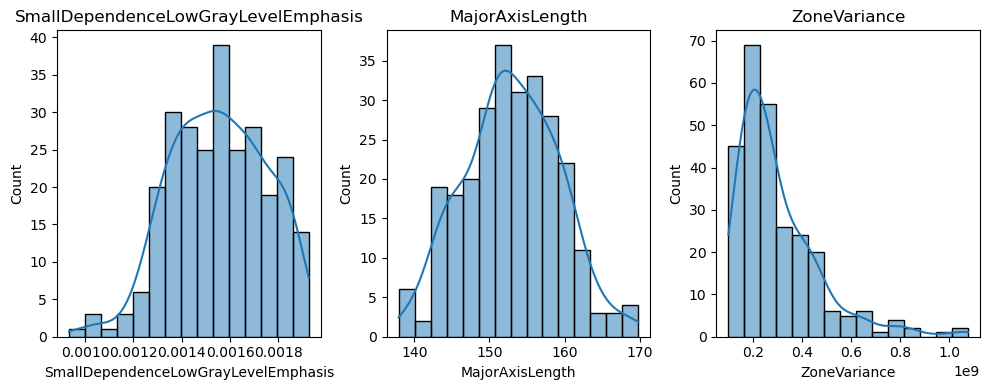

'\nDescription: \n\n\n> SmallDependenceLowGrayLevelEmphasis: \nrange:between 0 and 0.002 __ spread: left skewed __ shape: not perfectly normal.\nimplications: right-skewed distribution might suggests normalization\n\n> MajorAxisLength:\nrange:between 140 to 170 __ spread: roughly symmetric __ shape: close to a normal\nimplications: this feature may not need much preprocessing\n\n> ZoneVariance:\nrange: between 0 to over 1e9 __ spread: highly right skewed __ shape: not normal and is highly skewed\nimplications:  strong right skew, transformation may improve model performance.\n\n> also this features require scaling\n'

In [5]:
features=df.columns[:-1]

#selected_features =np.random.choice(features, 3, replace=False)
selected_features = ['SmallDependenceLowGrayLevelEmphasis', 'MajorAxisLength', 'ZoneVariance']

plt.figure(figsize=(10, 4))

for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i + 1)  
    sns.histplot(df[feature], kde=True, bins=15)  
    plt.title(f'{feature}')
    plt.xlabel(feature )
    
plt.tight_layout()
plt.show()
    
    
'''
Description: 


> SmallDependenceLowGrayLevelEmphasis: 
range:between 0 and 0.002 __ spread: left skewed __ shape: not perfectly normal.
implications: right-skewed distribution might suggests normalization

> MajorAxisLength:
range:between 140 to 170 __ spread: roughly symmetric __ shape: close to a normal
implications: this feature may not need much preprocessing

> ZoneVariance:
range: between 0 to over 1e9 __ spread: highly right skewed __ shape: not normal and is highly skewed
implications:  strong right skew, transformation may improve model performance.

> also this features require scaling
'''

#### Exercise 1.2: Correlation Heatmap of Features

- Objective: Explore relationships and potential multicollinearity among features.
- Instructions: Generate a correlation matrix and plot it as a heatmap. Identify any features with strong correlations and discuss whether they might provide redundant information to a model.

-> JointAverage and SumAverage have a correlation of 1.000000
-> MeshVolume and VoxelVolume have a correlation of 1.000000
-> LargeAreaEmphasis and ZoneVariance have a correlation of 0.999999
-> Autocorrelation and HighGrayLevelEmphasis have a correlation of 0.999970
-> ClusterTendency and SumSquares have a correlation of 0.999782
-> Id and Idm have a correlation of 0.999750
-> GrayLevelVariance and SumSquares have a correlation of 0.999608
-> DifferenceAverage and Idm have a correlation of -0.999320
-> Id and RunPercentage have a correlation of -0.999285
-> ClusterTendency and GrayLevelVariance have a correlation of 0.999231


'\nDescription:\n\n\n> these pairs may provide redundant information to the model and need to handled\n    the solution can be removing these pairs or use PCA\n\n'

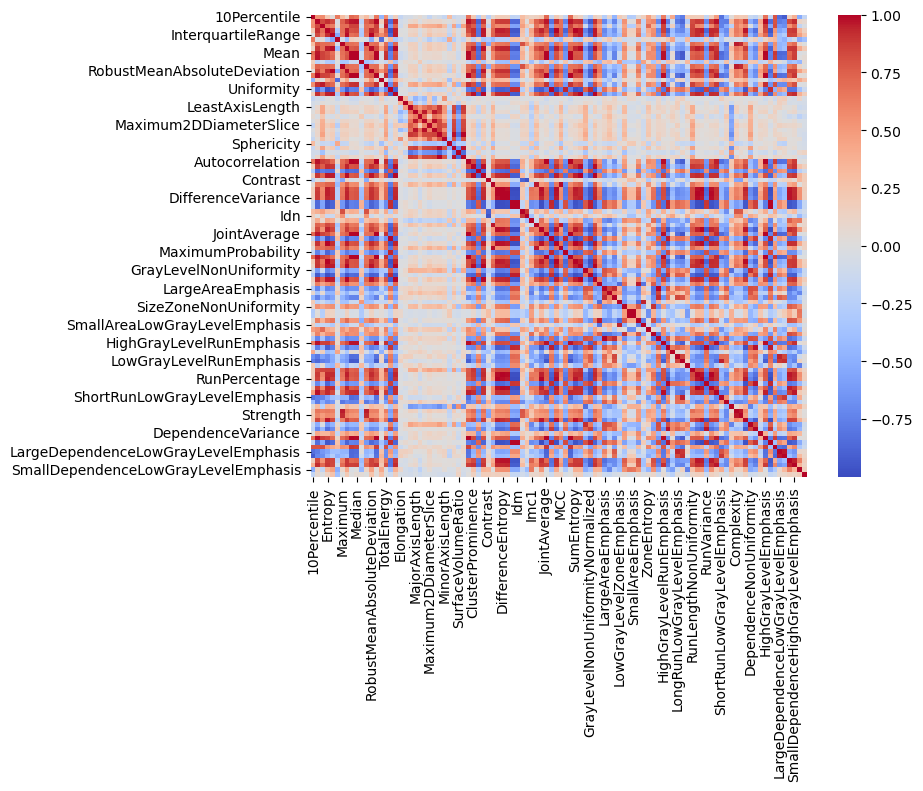

In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(corr_matrix, cmap='coolwarm')


 
#>>strong correlations
threshold = 0.9  #خودم اینطور فرض کردم
strong_corr = set()  

for column in corr_matrix.columns:
    for row in corr_matrix.index:
        if abs(corr_matrix.loc[row, column]) > threshold and column != row:
            pair = tuple(sorted([column, row]))
            strong_corr.add((pair, corr_matrix.loc[row, column]))

strong_corr = list(strong_corr)  
strong_corr.sort(key=lambda x: abs(x[1]), reverse=True)  

for pair, correlation in strong_corr[:10]:
    print(f"-> {pair[0]} and {pair[1]} have a correlation of {correlation:.6f}")



'''
Description:


> these pairs may provide redundant information to the model and need to handled
    the solution can be removing these pairs or use PCA

'''

### 2. Dataset Size Reduction Effects

#### Exercise 2.1: Train Models with Reduced Dataset Sizes

- Objective: Examine how model performance changes with a smaller dataset.
- Instructions: Create three different subsets of the dataset, sampling 20%, 50%, and 80% of the full data. Train all the models that were taught in the notebook on each subset, then evaluate and compare the model performance metrics with those of the full dataset. Record your results in a table and discuss any observed trends or changes.
- How to find optimum `n_components` for PCA

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LR

x = df.iloc[:, :-1]
y = df.iloc[:, -1]   

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sample_sizes = [0.20, 0.50, 0.80]  

models = {
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "AdaBoost Classifier": AdaBoostClassifier(algorithm='SAMME', random_state=42),  # Updated line
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": xgb.XGBClassifier(random_state=42),
    "Stacking Classifier": StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)), 
                                                          ('lr', LR())], final_estimator=LogisticRegression())
}


scaler = StandardScaler()
results = []

for sample in sample_sizes:
    x_subset, _, y_subset, _ = train_test_split(x_train_full, y_train_full, train_size=sample, random_state=42)
    
    X_scaled = scaler.fit_transform(x_subset)
    X_test_scaled = scaler.transform(x_test)
    
    for model_name, model in models.items():
        model.fit(X_scaled, y_subset)
        
        y_pred = model.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results.append({
            "Model": model_name,
            "Sample Size": f"{int(sample * 100)}%",
            "Accuracy": f"{accuracy:.3f}",
            "Precision": f"{report['weighted avg']['precision']:.3f}",
            "Recall": f"{report['weighted avg']['recall']:.3f}",
            "F1-Score": f"{report['weighted avg']['f1-score']:.3f}"
        })

results_df = pd.DataFrame(results)
results_df


,Model,Sample Size,Accuracy,Precision,Recall,F1-Score
0,SVM,20%,0.444,0.423,0.444,0.338
1,Logistic Regression,20%,0.500,0.513,0.500,0.492
2,Decision Tree,20%,0.500,0.534,0.500,0.460
3,Bagging Classifier,20%,0.500,0.534,0.500,0.460
4,AdaBoost Classifier,20%,0.444,0.453,0.444,0.426
5,Gradient Boosting Classifier,20%,0.444,0.453,0.444,0.426
6,XGBoost Classifier,20%,0.519,0.548,0.519,0.495
7,Stacking Classifier,20%,0.500,0.760,0.500,0.370
8,SVM,50%,0.574,0.588,0.574,0.571
9,Logistic Regression,50%,0.667,0.690,0.667,0.663


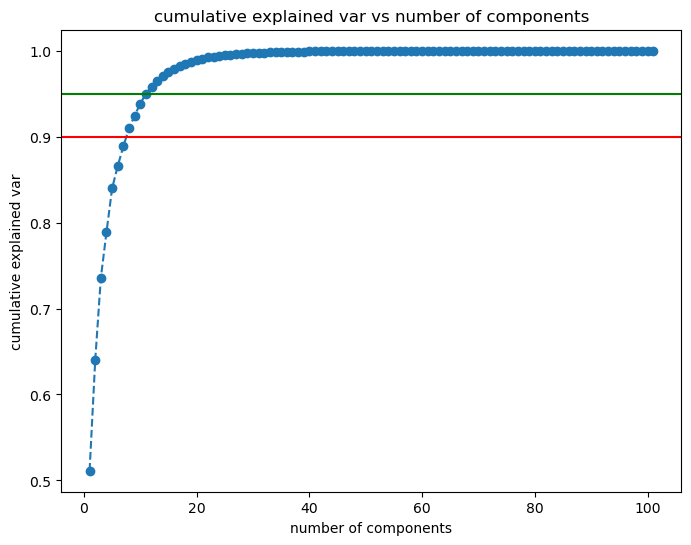

optimal number of components for 90% var: 8
optimal number of components for 95% var: 11


In [8]:
from sklearn.decomposition import PCA


scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.iloc[:, :-1])  

pca = PCA().fit(x_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained var')
plt.title('cumulative explained var vs number of components')
plt.axhline(y=0.90, color='r')  # 90%  var
plt.axhline(y=0.95, color='g')  #  95%  var
plt.show()

n_components_90 = (cumulative_variance >= 0.90).argmax() + 1
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1

print(f"optimal number of components for 90% var: {n_components_90}")
print(f"optimal number of components for 95% var: {n_components_95}")


#### Exercise 2.2: Visualize Learning Curves

- Objective: Show how dataset size influences learning and performance.
- Instructions: Choose one model and plot a learning curve, showing accuracy as a function of training size. Interpret the learning curve to discuss how performance is affected by training data quantity and identify any signs of underfitting or overfitting.

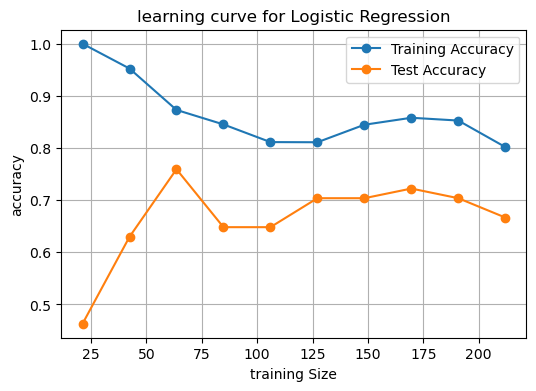

In [9]:


model = LogisticRegression(solver='saga', max_iter=1000, random_state=42, class_weight='balanced')

training_sizes = np.linspace(0.1, 1.0, 10)

train_accuracies = []
test_accuracies = []

for size in training_sizes:
    x_train_subset = x_train_full[:int(size * len(x_train_full))]
    y_train_subset = y_train_full[:int(size * len(y_train_full))]
    
    X_train_scaled = scaler.fit_transform(x_train_subset)
    X_test_scaled = scaler.transform(x_test)

    model.fit(X_train_scaled, y_train_subset)
    
    train_accuracy = accuracy_score(y_train_subset, model.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(6, 4))
plt.plot(training_sizes * len(x_train_full), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(training_sizes * len(x_train_full), test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('training Size')
plt.ylabel('accuracy')
plt.title('learning curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


### 3. Cross-Validation and Model Stability

#### Exercise 3.1: Apply k-Fold Cross-Validation

- Objective: Understand how cross-validation provides stable accuracy estimates.
- Instructions: Implement 5, 10, and 20-fold cross-validation for all the models that were taught in the notebook and plot the accuracy across each fold. Discuss any observed variance among folds and what it implies about the model’s stability on this dataset.

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

x_scaled = scaler.fit_transform(x)

folds = [5, 10, 20]

fig, axes = plt.subplots(len(models), len(folds), figsize=(15, 20))

for i, (model_name, model) in enumerate(models.items()):
    for j, fold in enumerate(folds):
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        
        accuracies = cross_val_score(model, x_scaled, y, cv=cv, scoring='accuracy')
        
        ax = axes[i, j]  
        ax.plot(np.arange(1, fold+1), accuracies, marker='o', color='green')
        ax.set_title(f'{model_name} ({fold}-Fold)')
        ax.set_xlabel('Fold')
        ax.set_ylabel('Accuracy')
        ax.grid(True)

plt.tight_layout()
fig.suptitle('Model Accuracy Across Different Folds', y=1.02)
plt.show()
